### Import necessary libraries

In [2]:
# Import necessary libraries

import numpy as np# Library for numerical operations
import pandas as pd# Library for data manipulation and analysis
import nltk# Natural Language Toolkit for text processing
import random# Library for generating random numbers
import os# Operating system module


### Visualization

In [4]:
import matplotlib as mpl  # Library for creating visualizations
import matplotlib.pyplot as plt  # Module for creating plots and charts
import seaborn as sns  # Statistical data visualization library
import sklearn
from sklearn.decomposition import TruncatedSVD

### Modeling

In [5]:
import statsmodels.api as sm  # Library for statistical models
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Sentiment analysis tool
from nltk.sentiment.util import *  # Utility functions for sentiment analysis
from nltk.util import ngrams  # Utility function for generating n-grams
from collections import Counter  # Data structure for counting elements
from gensim.models import word2vec  # Library for word embedding models

In [8]:
# Read and Peak at Data
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [9]:
df.shape

(23486, 11)

In [10]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df.drop(df.columns[0],inplace=True, axis=1)
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [13]:
# Delete missing observations for following variables
for x in ["Title", "Division Name", "Department Name", "Class Name", "Review Text"]:
    df = df[df[x].notnull()]  # Filtering the dataframe to include only rows where the specified columns are not null

# Iterate over the list of column names ["Division Name", "Department Name", "Class Name", "Review Text"]
# For each column name, filter the dataframe (df) to include only rows where the column is not null

In [14]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [15]:
df.shape

(19662, 10)

In [16]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [17]:
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
19882,862,45,Love this top!!,"I purchased this in the blue motif. i am 5'4,...",5,1,2,General,Tops,Knits
11397,1074,71,Love this!,This dress looks great on...feminine and swish...,5,1,9,General,Dresses,Dresses
22253,357,52,Love this skort!,I was hesitant to buy this due to the price bu...,5,1,5,General,Bottoms,Shorts


In [18]:
df.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,921.297274,200.227528,1.0,861.0,936.0,1078.0,1205.0
Age,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.652477,5.834285,0.0,0.0,1.0,3.0,122.0


In [22]:
df['Clothing ID'].unique()

array([1077, 1049,  847, ...,  721,  262,  522])

In [23]:
df['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
201       1
1200      1
525       1
1127      1
522       1
Name: Clothing ID, Length: 1095, dtype: int64

In [24]:
popular_products = pd.DataFrame(df.groupby('Clothing ID')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
Clothing ID,
1078,871
862,658
1094,651
1081,487
829,452
872,450
1110,419
868,370
895,336


<AxesSubplot:xlabel='Clothing ID'>

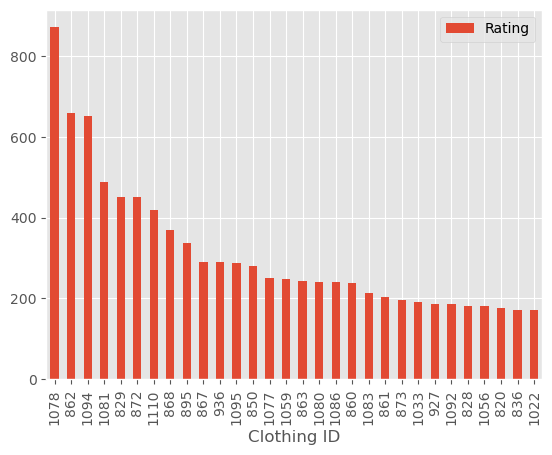

In [25]:
most_popular.head(30).plot(kind = "bar")

In [26]:
df_1 = df.head(10000)

In [29]:
ratings_utility_matrix = df_1.pivot_table(values='Rating', index='Age', columns='Clothing ID', fill_value=0)
ratings_utility_matrix.head()

Clothing ID,2,4,5,12,13,14,17,18,20,21,...,1177,1182,1184,1187,1189,1195,1197,1199,1202,1204
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [30]:
ratings_utility_matrix.shape

(74, 631)

In [31]:
X = ratings_utility_matrix.T
X.head()

Age,18,19,20,21,22,23,24,25,26,27,...,82,83,84,85,86,89,90,91,93,99
Clothing ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X.shape

(631, 74)

In [33]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(631, 10)

In [34]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(631, 631)

In [53]:
X.shape

(631, 74)

In [56]:
X.index[5]

14

In [63]:
i = "14"
product_names = list(X.index)
product_ID = product_names.index(i)

ValueError: '14' is not in list

In [58]:
i = "14"
product_names = list(X.index)

if i in product_names:
    product_ID = product_names.index(i)
    print("Product ID:", product_ID)
else:
    print("Product not found in the list.")

Product not found in the list.


In [59]:
X

Age,18,19,20,21,22,23,24,25,26,27,...,82,83,84,85,86,89,90,91,93,99
Clothing ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
